In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Hierarchical Clustering

Let us look at the steps in hierarchical clustering before the implementation. For demonstration purposes, you have the data of the number of people at the last year's comic-con at a given time. Comic-Con is an annual comic-based convention held in major cities in the world. 

You would like to decide the location of your stall to maximize sales. let us consider this 36 points on a 2D plane.

**Step1:**

In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

**Step2:**

Next, the distances between all pairs of cluster centers are computed and the two closest clusters are merged. The cluster center of the merged cluster is then recomputed. 

**Step3:**

Then the clusters with the closest cluster centers are merged. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. 

**Step4:**

As visible from the distribution of points, let us stop at three clusters. Finally, these are three clusters that you arrive at after the algorithm has run.

In [2]:
x = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 
     84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]

y = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 
     95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

## A list of 20 points with x and y coordinates is stored in a dataframe.

comic_con = pd.DataFrame({"x_coordinate": x, 'y_coordinate':y})

#### Plotting data for clustering - the scatter plot

As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data.

<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

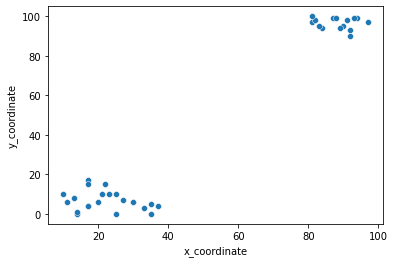

In [3]:
## First visualize this points for gaining insights

sns.scatterplot(x="x_coordinate", y='y_coordinate', data=comic_con)

In the scatter plot we can see that there are two areas where People sightings are dense. This means that the points seem to separate into two clusters. Now, we will form two clusters of the sightings using hierarchical clustering.

#### Normalization of data

Normalization of data is an important step in processing data that we should apply before performing clustering. It is a process by which we rescale the values of a variable with respect to standard deviation of the data.

The process of normalization is achieved through dividing a value by its standard deviation. The resultant standard deviation post normalization is 1. 

A normalization library is available on the `SciPy` package,using the `whiten` method of the `vq` class. First, we initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. 

In [4]:
# Import the whiten function
from scipy.cluster.vq import whiten

In [5]:
comic_con['x_scaled'] = whiten(comic_con["x_coordinate"])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


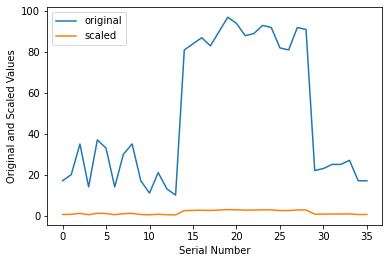

In [6]:
# Plot original data
plt.plot(comic_con['x_coordinate'], label='original')

# Plot scaled data
plt.plot(comic_con['x_scaled'], label='scaled')

plt.xlabel("Serial Number")
plt.ylabel("Original and Scaled Values")

plt.legend()
plt.show()

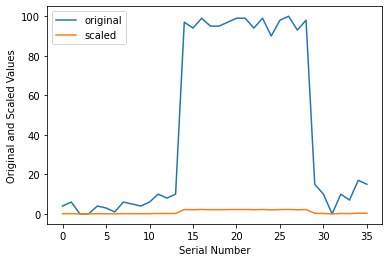

In [7]:
# Plot original data
plt.plot(comic_con['y_coordinate'], label='original')

# Plot scaled data
plt.plot(comic_con['y_scaled'], label='scaled')

plt.xlabel("Serial Number")
plt.ylabel("Original and Scaled Values")

plt.legend()
plt.show()

As you can see by using Normalization, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

#### Hierarchical clustering in SciPy

Let us now look at its simple implementation in SciPy. The required methods for hierarchical clustering, linkage and fcluster, are stored in scipy-dot-cluster-dot-hierarchy. 

In [8]:
from scipy.cluster.hierarchy import linkage, fcluster

#### Creating a distance matrix using linkage

A critical step is to compute the distance matrix at each stage. The linkage method computes distances between intermediate clusters. That means, this process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points.

There are four parameters for this method: 
- The first parameter is the observations. 
- The second parameter, `method`, tells the algorithm how to calculate proximity between two clusters. 
- The `metric` is the function that decides the distance between two objects. Euclidean distance is a straight line distance   between two points on a 2D plane. You can use your own function here. 
- The `optimal_ordering` is an optional argument that changes the order of linkage matrix. We will not use this argument here. 


#### Tweaking Method Parameter:

The second parameter, method, decides how clusters are separated at each step. This is the parameter that we will tweak in this lesson and see the differences.

#### Method = "ward"

The ward method computes cluster proximity using the difference between summed squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center.

In [9]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = "ward", metric = 'euclidean')

In [10]:
#distance_matrix

#### Create cluster labels with fcluster

Once you have created the distance matrix, you can create the cluster labels through the fcluster method, which takes three arguments:
- the distance matrix, 
- the number of clusters and 
- the criteria to form the clusters based on certain thresholds. We will use the value of maxclust in the criterion argument.

In [11]:
# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


In [45]:
comic_con['cluster_labels'].value_counts()

2    21
1    15
Name: cluster_labels, dtype: int64

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

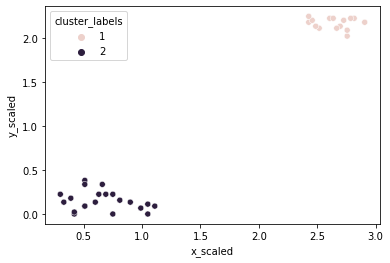

In [13]:
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)

This is the result using the ward method. Notice that clusters are generally dense towards the centers.

#### Method = "single"

The single method decides the proximity of clusters based on their two closest objects.

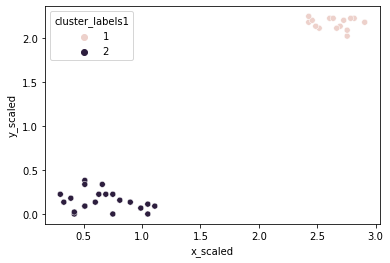

In [14]:
# Use the linkage() function
distance_matrix1 = linkage(comic_con[['x_scaled', 'y_scaled']], method = "single", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels1'] = fcluster(distance_matrix1, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels1', data = comic_con)
plt.show()

Recall the single method used the two closest objects between clusters to determine the inter-cluster proximity. Naturally, the clusters formed when performing clustering through this method are more dispersed.

#### Method = "complete"

The complete method decides the proximity of cluster centers based on their two farthest objects. 

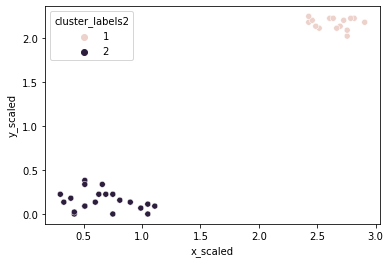

In [15]:
# Use the linkage() function
distance_matrix2 = linkage(comic_con[['x_scaled', 'y_scaled']], method = "complete", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels2'] = fcluster(distance_matrix2, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels2', data = comic_con)
plt.show()

In the final iteration, we look at the clusters formed by the complete method. This method uses the two farthest objects among clusters to determine inter-cluster proximity. Coincidentally, though, the results of the complete method on the same data points that we used is similar to that of the ward method.

There are some other methods, like- 
- The `average` and `centroid` methods decide cluster proximities based on arithmetic and geometric means, respectively. 
- The `median` method uses the median of cluster objects.

### Final thoughts on selecting a method

There is no right method that you can apply to all problems that you face. You would need to carefully study the data that you are going to handle to decide which method is right for your case.

#### Dendrograms

Up until this point, we have graphically looked at the number of points in our data sets to decide how many clusters to form. To decide on the number of clusters in hierarchical clustering, we can use a graphical diagram called the dendrogram. 

A dendrogram is a branching diagram that shows the progression in a linkage object as we proceed through the hierarchical clustering algorithm.

#### Create a dendrogram in SciPy

The first step in creating a dendrogram is to import the method from scipy-dot-cluster-dot-hierarchy. Next, we use the linkage method to create a distance matrix. Finally, we use the dendrogram method and provide the linkage object as an argument, and display the plot.

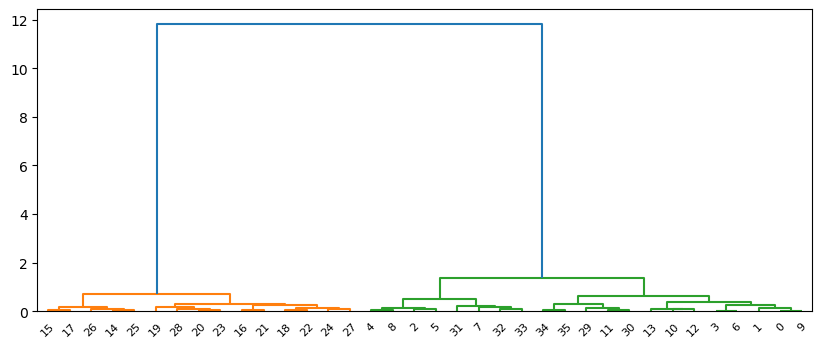

In [16]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,4), dpi = 100)
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

#### Dendrogram demonstration

To understand the intricacies of a dendrogram, let us look at the dendrogram that has been generated and then make corresponding clusters. 

- Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters. 

- In the dendrogram, each inverted U represents a cluster divided into its two child clusters. The inverted U at the top of the figure represents a single cluster of all the data points. 

- The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.

Now, if you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. 

If we draw a horizontal line at any part of the figure, we'll see that there are 2 clusters. 

When you move the line below, the number of clusters increases but the inter-cluster distance decreases. This information helps us in deciding the number of clusters. 

For instance, even though we haven't looked at the distribution of the data points, it seems that the top 2 clusters have the highest distances between them. 

There is no right metric to decide how many clusters are ideal. For instance, it looks like choosing 2 clusters should be ideal for this exercise. However, one's argument for 4 or 8 clusters may stand as well. 

### Limitations of hierarchical clustering

The technique of hierarchical clustering infeasible for huge number of data points.

In [17]:
import timeit

In earlier exercises you have used the data of Comic-Con footfall to create clusters. 

In this exercise you will time how long does it take to the run the linkage function on the comic con data?

In [44]:
%timeit fcluster(distance_matrix2, 2, criterion='maxclust')

106 µs ± 821 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Example: FIFA 18: exploring defenders

The FIFA 18 dataset consists of 5000 rows, and is considerably larger than earlier dataset. Various attributes of players are present in this dataset. Two such attributes are:

- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player

These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [19]:
fifa = pd.read_csv("fifa_18_dataset.csv")
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [20]:
fifa['scaled_sliding_tackle'] = whiten(fifa["sliding_tackle"])
fifa['scaled_aggression'] = whiten(fifa["aggression"])
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


In [21]:
# Fit the data into a hierarchical clustering algorithm
fifa_distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

In [23]:
%timeit fifa_distance_matrix

24.6 ns ± 0.638 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [25]:
fifa['cluster_labels'] = fcluster(fifa_distance_matrix, 3, criterion='maxclust')
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression,cluster_labels
0,23,63,1.070924,3.609257,3
1,26,48,1.210610,2.749910,3
2,33,56,1.536544,3.208228,3
3,38,78,1.769353,4.468604,2
4,11,29,0.512181,1.661404,1


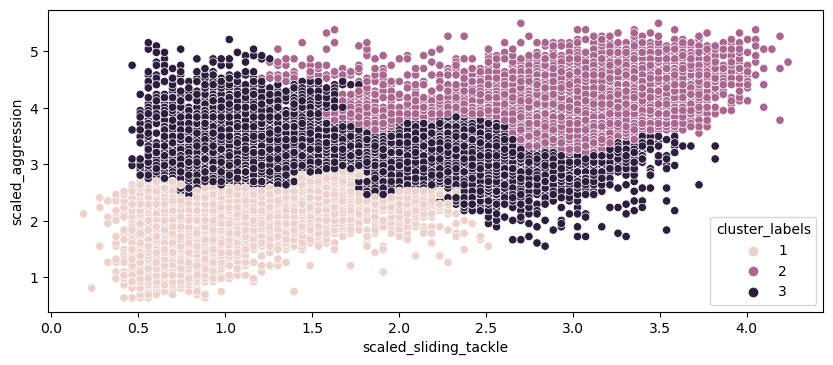

In [27]:
# Create a scatter plot through seaborn
plt.figure(figsize=(10,4), dpi = 100)
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

In [41]:
# Display cluster centers of each cluster
fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby("cluster_labels").mean()

,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,0.987373,1.849142
2,3.013487,4.063492
3,1.934455,3.210802


In [42]:
cluster_centers_sst = fifa['scaled_sliding_tackle'].groupby(fifa["cluster_labels"]).mean()
cluster_centers_sst

cluster_labels
1    0.987373
2    3.013487
3    1.934455
Name: scaled_sliding_tackle, dtype: float64

In [43]:
cluster_centers_sa = fifa['scaled_aggression'].groupby(fifa["cluster_labels"]).mean()
cluster_centers_sa

cluster_labels
1    1.849142
2    4.063492
3    3.210802
Name: scaled_aggression, dtype: float64

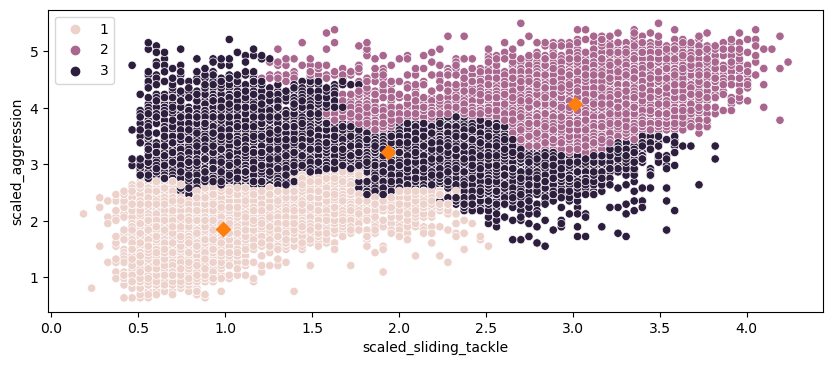

In [40]:
# Display cluster centers of each cluster

plt.figure(figsize=(10,4), dpi = 100)
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.scatter(cluster_centers_sst,cluster_centers_sa, marker = "D", s = 50)

plt.legend()
plt.show()